In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import pearsonr
from scipy import stats
import nibabel as nb
import seaborn as sns
import plot_funcs

### get the subject list

In [2]:
subjlist = '../data/subjectListS900_QC_gr.txt'
f = open(subjlist); mylist = f.read().split("\n"); f.close() 
subjlist = joinedlist = mylist[:-1]
len(subjlist)


709

## Left hemisphere 

In [3]:
# create empty dataframe for the mean T1w/T2w intensity values along the subfields and for each subject
DF_indiv_mean_t1wt2w  = pd.DataFrame(index = subjlist, 
                                     columns = ['t1-t2-LSUB', 't1-t2-LCA', 't1-t2-LDG'])
# create empty arrays for the group-level T1w/T2w intensity values along the subfields
sumi_LSUB = np.zeros((1024,))
sumi_LCA  = np.zeros((2048,))
sumi_LDG = np.zeros((1024,))

# create empty arrays for the individual-level T1w/T2w intensity values along the subfields
sumi_all_LSUB = np.zeros((709,1024))
sumi_all_LCA  = np.zeros((709,2048))
sumi_all_LDG  = np.zeros((709,1024))

### read-in individual T1w/T2w intensity values along the subfields for each subject

In [4]:
workdir   = '../data/bladesMniGifti_T1wT2w/'

j = 0

for subjid in subjlist:

    # filename for t1w-t2w ratio, resampled along right hippocampus
    vol2hipp_LSUB = os.path.join(workdir, 'HCP_%s_L_SUB_skelFinal.shape.gii' % (subjid))  
    vol2hipp_LCA  = os.path.join(workdir, 'HCP_%s_L_CA_skelFinal.shape.gii' % (subjid)) 
    vol2hipp_LDG  = os.path.join(workdir, 'HCP_%s_L_DG_skelFinal.shape.gii' % (subjid))  

    t1wt2w_LSUB = nb.load(vol2hipp_LSUB).agg_data()
    t1wt2w_LCA  = nb.load(vol2hipp_LCA).agg_data()
    t1wt2w_LDG  = nb.load(vol2hipp_LDG).agg_data()    
    
    DF_indiv_mean_t1wt2w.at[subjid, 't1-t2-LSUB'] = t1wt2w_LSUB.mean()     
    DF_indiv_mean_t1wt2w.at[subjid, 't1-t2-LCA' ] = t1wt2w_LCA.mean()     
    DF_indiv_mean_t1wt2w.at[subjid, 't1-t2-LDG' ] = t1wt2w_LDG.mean()     
        
    sumi_LSUB += t1wt2w_LSUB
    sumi_LCA  += t1wt2w_LCA
    sumi_LDG  += t1wt2w_LDG
    
    sumi_all_LSUB[j,:] = t1wt2w_LSUB
    sumi_all_LCA[j,:]  = t1wt2w_LCA
    sumi_all_LDG[j,:]  = t1wt2w_LDG
    
    j += 1    
        
print(j)        
group_t1wt2w_LSUB = sumi_LSUB/j
group_t1wt2w_LCA  = sumi_LCA/j
group_t1wt2w_LDG  = sumi_LDG/j


709


In [5]:
sumi_all_LSUB.mean(), sumi_all_LSUB.std()

(2.0242498246710703, 0.41059361997124016)

In [6]:
sumi_all_LCA.mean(), sumi_all_LCA.std()

(2.008639068328686, 0.7795565840586799)

In [7]:
sumi_all_LDG.mean(), sumi_all_LDG.std()

(1.6564004685715292, 0.21753406489589847)

0 t1-t2-LSUB
1 t1-t2-LCA
2 t1-t2-LDG


[(1.2, 3.0)]

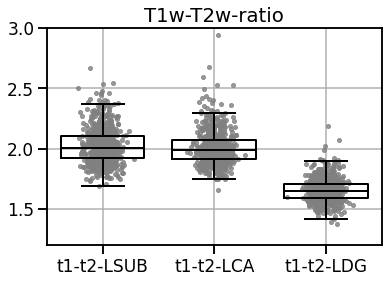

In [8]:
sns.set_context("talk", font_scale=1.1)

colstoplot = ['t1-t2-LSUB', 't1-t2-LCA', 't1-t2-LDG']

dk = pd.DataFrame({'t1-t2-LSUB':np.array(DF_indiv_mean_t1wt2w['t1-t2-LSUB']).astype(float),
                   't1-t2-LCA':np.array(DF_indiv_mean_t1wt2w['t1-t2-LCA']).astype(float),
                   't1-t2-LDG':np.array(DF_indiv_mean_t1wt2w['t1-t2-LDG']).astype(float),})

for i,d in enumerate(colstoplot):
    print(i, d)
    y = dk[d]
    x = np.random.normal(i+1, 0.08, len(y))
    plt.plot(x, y, 
             marker="o", 
             markeredgewidth = 1,
             linestyle='None',
             color='grey', 
             markersize=4,  
             alpha=0.8)
    
ax = dk.boxplot(column=colstoplot,
                fontsize=17, 
                color=dict(boxes='k', whiskers='k', medians='k', caps='k'),
                boxprops=dict(linestyle='-', linewidth=2),
                flierprops=dict(linestyle='-', linewidth=2),
                medianprops=dict(linestyle='-', linewidth=2),
                whiskerprops=dict(linestyle='-', linewidth=2),
                capprops=dict(linestyle='-', linewidth=2),
                widths=(0.75, 0.75, 0.75),
                showfliers=False,)

ax.set_title("T1w-T2w-ratio")    
ax.set(ylim=(1.2, 3))
    

## Right hemisphere

### read-in individual T1w/T2w intensity values along the subfields for each subject

In [9]:
# create empty dataframe for the mean T1w/T2w intensity values along the subfields and for each subject
DF_indiv_mean_t1wt2w  = pd.DataFrame(index = subjlist, 
                                     columns = ['t1-t2-RSUB', 't1-t2-RCA', 't1-t2-RDG'])
# create empty arrays for the group-level T1w/T2w intensity values along the subfields
sumi_RSUB = np.zeros((1024,))
sumi_RCA  = np.zeros((2048,))
sumi_RDG = np.zeros((1024,))

# create empty arrays for the individual-level T1w/T2w intensity values along the subfields
sumi_all_RSUB = np.zeros((709,1024))
sumi_all_RCA  = np.zeros((709,2048))
sumi_all_RDG  = np.zeros((709,1024))

In [10]:
workdir   = '../data/bladesMniGifti_T1wT2w/'

j = 0

for subjid in subjlist:

    # filename for t1w-t2w ratio, resampled along right hippocampus
    vol2hipp_RSUB = os.path.join(workdir, 'HCP_%s_R_SUB_skelFinal.shape.gii' % (subjid))  
    vol2hipp_RCA  = os.path.join(workdir, 'HCP_%s_R_CA_skelFinal.shape.gii' % (subjid)) 
    vol2hipp_RDG  = os.path.join(workdir, 'HCP_%s_R_DG_skelFinal.shape.gii' % (subjid))  

    t1wt2w_RSUB = nb.load(vol2hipp_RSUB).agg_data()
    t1wt2w_RCA  = nb.load(vol2hipp_RCA).agg_data()
    t1wt2w_RDG  = nb.load(vol2hipp_RDG).agg_data()    
    
    DF_indiv_mean_t1wt2w.at[subjid, 't1-t2-RSUB'] = t1wt2w_RSUB.mean()     
    DF_indiv_mean_t1wt2w.at[subjid, 't1-t2-RCA' ] = t1wt2w_RCA.mean()     
    DF_indiv_mean_t1wt2w.at[subjid, 't1-t2-RDG' ] = t1wt2w_RDG.mean()     
        
    sumi_RSUB += t1wt2w_RSUB
    sumi_RCA  += t1wt2w_RCA
    sumi_RDG  += t1wt2w_RDG
    
    sumi_all_RSUB[j,:] = t1wt2w_RSUB
    sumi_all_RCA[j,:]  = t1wt2w_RCA
    sumi_all_RDG[j,:]  = t1wt2w_RDG
    
    j += 1    
        
print(j)        
group_t1wt2w_RSUB = sumi_RSUB/j
group_t1wt2w_RCA  = sumi_RCA/j
group_t1wt2w_RDG  = sumi_RDG/j


709


In [11]:
sumi_all_RSUB.mean(), sumi_all_RSUB.std()

(1.9883627728400628, 0.4306975485055465)

In [12]:
sumi_all_RCA.mean(), sumi_all_RCA.std()

(2.009318436923671, 0.6776930643350547)

In [13]:
sumi_all_RDG.mean(), sumi_all_RDG.std()

(1.6867449843244757, 0.22552297822684536)

### plot mean t1w/t2w intensity values for all individuals (RIGHT hemisphere)

0 t1-t2-RSUB
1 t1-t2-RCA
2 t1-t2-RDG


[(1.2, 3.0)]

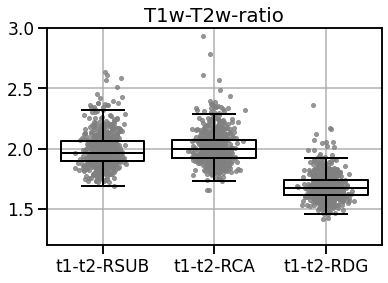

In [14]:
sns.set_context("talk", font_scale=1.1)

colstoplot = ['t1-t2-RSUB', 't1-t2-RCA', 't1-t2-RDG']

dk = pd.DataFrame({'t1-t2-RSUB':np.array(DF_indiv_mean_t1wt2w['t1-t2-RSUB']).astype(float),
                   't1-t2-RCA':np.array(DF_indiv_mean_t1wt2w['t1-t2-RCA']).astype(float),
                   't1-t2-RDG':np.array(DF_indiv_mean_t1wt2w['t1-t2-RDG']).astype(float),})

for i,d in enumerate(colstoplot):
    print(i, d)
    y = dk[d]
    x = np.random.normal(i+1, 0.08, len(y))
    plt.plot(x, y, 
             marker="o", 
             markeredgewidth = 1,
             linestyle='None',
             color='grey', 
             markersize=4,  
             alpha=0.8)
    
ax = dk.boxplot(column=colstoplot,
                fontsize=17, 
                color=dict(boxes='k', whiskers='k', medians='k', caps='k'),
                boxprops=dict(linestyle='-', linewidth=2),
                flierprops=dict(linestyle='-', linewidth=2),
                medianprops=dict(linestyle='-', linewidth=2),
                whiskerprops=dict(linestyle='-', linewidth=2),
                capprops=dict(linestyle='-', linewidth=2),
                widths=(0.75, 0.75, 0.75),
                showfliers=False,)

ax.set_title("T1w-T2w-ratio")    
ax.set(ylim=(1.2, 3))
    